# Unit 5 - Financial Planning


In [23]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [24]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [25]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [26]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [27]:
import json

# Fetch current BTC price
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent=4))
btc_price = btc_data['data']["1"]['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))
eth_price = eth_data['data']["1027"]['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $13,627.09
The current value of your 5.3 ETH is $1,951.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [28]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [29]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [30]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [31]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.iloc[0]['AGG']['close']
spy_close_price = df_portfolio.iloc[0]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [32]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $17,362.50
The current value of your 200 AGG shares is $23,576.00


### Savings Health Analysis

In [33]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [(my_btc_value+my_eth_value), (my_spy_value+my_agg_value)]}, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,15578.711
shares,40938.500


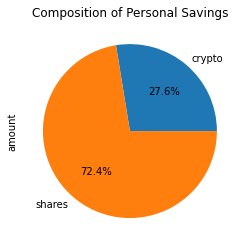

In [34]:
# Plot savings pie chart
df_savings.plot(y=0, kind='pie', title="Composition of Personal Savings", legend=False, autopct='%1.1f%%')

In [35]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = my_spy_value + my_agg_value

# Validate saving health
if savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif savings == emergency_fund:
    print("Congratulations! You have reached this financial goal.")
else:
    print(f"You are ${(emergency_fund - savings):0,.2f} away from reaching this goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [38]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.sample()

AGG                                       SPY  \
                             open    high       low  close   volume    open   
2016-03-23 00:00:00-04:00  109.96  110.14  109.8601  110.1  2750804  204.11   

                                                             
                             high     low   close    volume  
2016-03-23 00:00:00-04:00  204.33  203.01  203.24  67124272

In [39]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [40]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [41]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995209,1.013059,0.989542,1.006898,1.001483,1.003659,0.983436,1.008049,1.002228,1.008255,...,1.000806,1.002518,0.992495,0.993408,1.006428,1.001927,1.004885,1.003934,0.999789,1.002033
2,0.993941,1.017055,1.002294,1.010023,1.007511,1.007872,0.983052,1.016811,1.004200,1.001095,...,1.009450,1.002955,0.988640,0.998381,1.005284,0.997980,1.007438,1.000747,1.004571,1.006815
3,1.001894,1.020909,1.016591,1.013408,1.008343,1.015608,0.974725,1.019157,1.014941,1.016497,...,1.021529,1.015515,0.979922,0.988502,1.001919,0.975033,1.015979,1.004894,0.998715,1.020413
4,0.996897,1.025160,1.005425,1.013757,1.014873,0.996523,0.977443,1.014642,1.018959,1.016893,...,1.018400,1.009361,0.982924,0.982545,0.998766,0.975394,1.015084,1.010147,1.002466,1.013952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.491293,4.236999,11.044570,5.938696,17.430656,9.149264,5.288150,9.149300,10.423248,5.036565,...,6.200031,5.752288,4.470272,4.220511,19.487740,49.642598,2.368006,9.641687,4.001366,8.882822
7557,12.490019,4.242816,11.016757,5.915635,17.229086,9.068293,5.370837,9.020742,10.371836,5.098440,...,6.129097,5.858343,4.440715,4.222190,19.482411,50.334748,2.387329,9.662334,3.946927,8.909480
7558,12.604990,4.253424,11.039895,5.869480,17.314392,9.034847,5.367008,9.018987,10.350675,5.094902,...,6.147571,5.893960,4.490197,4.241938,19.551989,50.707815,2.376093,9.607921,3.934854,8.842560
7559,12.460900,4.293070,11.183303,5.920008,17.299288,9.203349,5.341796,9.025631,10.228801,5.135263,...,6.235547,5.838874,4.507489,4.268093,19.650595,50.842328,2.382887,9.529388,3.886439,8.877437


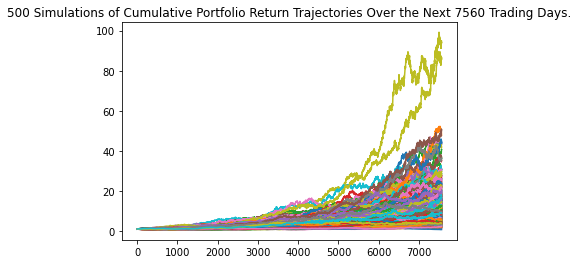

In [43]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

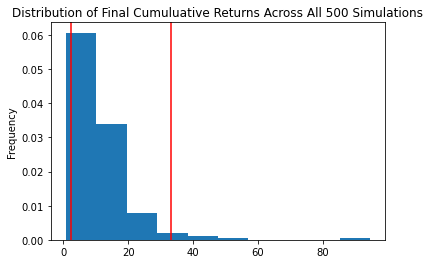

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.299630
std               9.111552
min               0.755076
25%               5.839063
50%               9.163628
75%              13.825243
max              94.659500
95% CI Lower      2.405739
95% CI Upper     33.164607
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $48,114.77 and $663,292.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $72,172.16 and $994,938.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [50]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

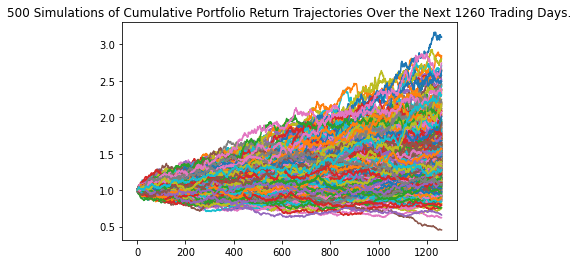

In [51]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

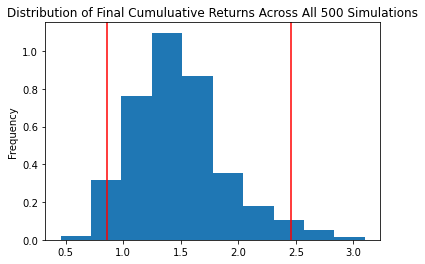

In [52]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist_five.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.479933
std               0.403919
min               0.455204
25%               1.178515
50%               1.451227
75%               1.684971
max               3.099235
95% CI Lower      0.861601
95% CI Upper      2.453338
Name: 1260, dtype: float64


In [54]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $51,696.04 and $147,200.28


### Ten Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999617,0.998959,1.001997,0.999910,0.991672,1.007413,1.010078,0.982404,1.003135,1.002380,...,1.001776,1.003825,1.000161,0.985000,0.992210,0.998700,1.009346,1.004164,1.007104,0.999496
2,1.009300,1.007373,0.999583,0.985019,1.009200,0.997369,1.013531,0.986456,0.999598,1.004525,...,0.997411,1.009463,0.998048,0.991585,0.990563,0.993874,1.016821,0.991234,1.003695,0.994876
3,1.009907,1.001313,0.996919,0.989708,0.997414,1.003563,1.013910,0.989477,1.012001,1.008082,...,0.999931,1.012975,0.997835,0.986314,0.996877,0.986075,1.023982,0.994248,0.990810,0.986342
4,1.012556,1.007320,0.995476,1.006874,0.995456,1.006216,1.021763,0.985828,1.014656,1.017191,...,1.005504,1.020246,1.000377,0.984779,0.989466,0.993830,1.010416,0.994171,1.010016,0.987041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.124655,1.923777,1.508497,1.919312,3.324384,1.978084,2.572023,3.865096,2.384589,1.434133,...,2.488094,1.887874,0.906195,1.439972,2.789692,5.613539,2.029664,1.203074,4.669578,1.667703
2517,1.114576,1.923422,1.518423,1.924456,3.366920,1.969787,2.588816,3.884749,2.379288,1.439704,...,2.486928,1.871987,0.899383,1.455299,2.829833,5.693522,2.006528,1.223243,4.661575,1.668310
2518,1.099982,1.933824,1.508727,1.924723,3.383736,1.965526,2.587914,3.848360,2.365012,1.432366,...,2.491725,1.886536,0.903404,1.452783,2.809552,5.757222,1.997754,1.217870,4.649694,1.666996
2519,1.100730,1.948152,1.515020,1.942127,3.358016,1.957538,2.586860,3.852275,2.365172,1.421576,...,2.514590,1.879897,0.906390,1.436719,2.797559,5.720591,1.997280,1.249668,4.623157,1.669536


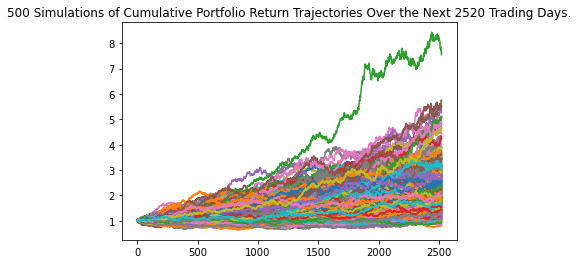

In [57]:
# Plot simulation outcomes
line_plot_ten = MC_dist_ten.plot_simulation()

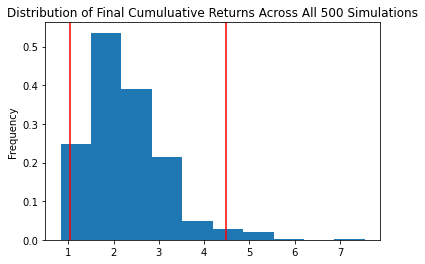

In [58]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_dist_ten.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.280551
std               0.857927
min               0.829693
25%               1.686160
50%               2.117538
75%               2.730675
max               7.546768
95% CI Lower      1.034203
95% CI Upper      4.482379
Name: 2520, dtype: float64


In [60]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0,.2f} and ${ci_upper_ten:0,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $62,052.19 and $268,942.72
